In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
from robot_tools import *
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px

### Tut 8.1

In [2]:
Beta = symbols('\\beta')
L = symbols('L')

alpha = {'R': pi,
        'F': 0}

beta = {'R': - pi/2,
        'F': Beta}

# Rear 1 (fixed standard)
symprint('Rear-wheel', '', '')
print('Rolling condition')
R_roll = Matrix([[sin(alpha['R'] + beta['R']), -cos(alpha['R'] + beta['R']), -L/2*cos(beta['R'])]])
display(R_roll)

# Rear 2 (fixed standard)
print('No sliding condition')
R_slide = Matrix([[cos(alpha['R'] + beta['R']), sin(alpha['R'] + beta['R']), L/2*sin(beta['R'])]])
display(R_slide)

# Front 1 (steerable standard)
symprint('Front-wheel','', '')
print('Rolling condition')
F_roll = Matrix([[sin(alpha['F'] + beta['F']), -cos(alpha['F'] + beta['F']), -L/2*cos(beta['F'])]])
display(F_roll)

# Front 2 (steerable standard)
print('No sliding condition')
F_slide = Matrix([[cos(alpha['F'] + beta['F']), sin(alpha['F'] + beta['F']), L/2*sin(beta['F'])]])
display(F_slide)

# Rolling condition matrix
symprint('Rolling-condition-matrix','', '')
R = Matrix([R_roll, F_roll])
print(f'Rank of rolling condition matrix is: {R.rank()}')
display(R)

# Rolling condition matrix
symprint('No-Sliding-condition-matrix','', '')
S = Matrix([R_slide, F_slide])
print(f'Rank of no sliding condition matrix is: {S.rank()}')
display(S)

Rear-wheel_

Rolling condition


Matrix([[1, 0, 0]])

No sliding condition


Matrix([[0, 1, -L/2]])

Front-wheel_

Rolling condition


Matrix([[sin(\beta), -cos(\beta), -L*cos(\beta)/2]])

No sliding condition


Matrix([[cos(\beta), sin(\beta), L*sin(\beta)/2]])

Rolling-condition-matrix_

Rank of rolling condition matrix is: 2


Matrix([
[         1,           0,               0],
[sin(\beta), -cos(\beta), -L*cos(\beta)/2]])

No-Sliding-condition-matrix_

Rank of no sliding condition matrix is: 2


Matrix([
[         0,          1,           -L/2],
[cos(\beta), sin(\beta), L*sin(\beta)/2]])

In [3]:
# Forward Kinematics

# Define symbols
Theta = symbols('theta')
Phi_dot = symbols('\dot{\phi}')
R = symbols('R')

# Define matrix
phi_dot_mat = Matrix([Phi_dot, 0, 0])
r_mat = Matrix([[R, 0, 0],
               [0, 0, 0],
               [0, 0, 0]])

M = Matrix([F_roll, R_slide, F_slide])              
              
# Rotational matrix from 0 to I
R_0I = Matrix([[cos(Theta), -sin(Theta), 0],
           [sin(Theta), cos(Theta), 0],
           [0, 0, 1]])

PI = simplify(R_0I * M**-1 * r_mat * phi_dot_mat)
print('r_mat * phi_dot_mat:')
display(simplify(r_mat * phi_dot_mat))
print('M**-1:')
display(simplify(M**-1))
print('M**-1 * r_mat * phi_dot_mat:')
display(simplify(M**-1 * r_mat * phi_dot_mat))
print('R_0I')
display(R_0I)
print('Final result: x_dot, y_dot, theta_dot')
display(PI)

r_mat * phi_dot_mat:


Matrix([
[R*\dot{\phi}],
[           0],
[           0]])

M**-1:


Matrix([
[   sin(\beta),    0,   cos(\beta)],
[-cos(\beta)/2,  1/2, sin(\beta)/2],
[-cos(\beta)/L, -1/L, sin(\beta)/L]])

M**-1 * r_mat * phi_dot_mat:


Matrix([
[   R*\dot{\phi}*sin(\beta)],
[-R*\dot{\phi}*cos(\beta)/2],
[-R*\dot{\phi}*cos(\beta)/L]])

R_0I


Matrix([
[cos(theta), -sin(theta), 0],
[sin(theta),  cos(theta), 0],
[         0,           0, 1]])

Final result: x_dot, y_dot, theta_dot


Matrix([
[R*\dot{\phi}*(sin(\beta - theta) + 3*sin(\beta + theta))/4],
[R*\dot{\phi}*(cos(\beta - theta) - 3*cos(\beta + theta))/4],
[                                -R*\dot{\phi}*cos(\beta)/L]])

(-6.298654776807531,
 0.2999359417527396,
 -3.309279017481592,
 0.7537661238178042)

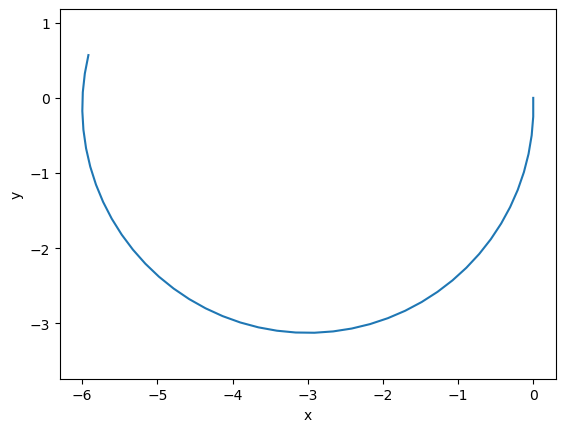

In [4]:
# Plot trajectory

# Change the beta and R to see effect

beta = 0 # pi/2
r = 0.5 

theta = 0

dt = 0.1
t = np.arange(0, 4 + dt, dt)

x_lst, y_lst = [0], [0]
for i in t:
    
    # Results of the forward kinematics
    PI_res = PI.subs({Phi_dot: 10, Beta: beta, Theta: theta, L: 6, R: r})
    x_dot, y_dot, theta_dot = float(PI_res[0]), float(PI_res[1]), float(PI_res[2])
    
    # Append the trajectory of the x and y
    x_lst.append(x_lst[-1] + x_dot * dt)
    y_lst.append(y_lst[-1] + y_dot * dt)
    
    theta += theta_dot * dt
    
plt.plot(x_lst, y_lst)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')


In [5]:
simplify(R* Phi_dot*sin(Beta)*cos(Theta) + R*Phi_dot*cos(Beta)/2*sin(Theta))

R*\dot{\phi}*(sin(\beta - theta) + 3*sin(\beta + theta))/4

### Tut 8.2

In [6]:
Beta = symbols('\\beta')
L = symbols('L')
D = symbols('d')

alpha = {'R1': pi/2,
         'R2': -pi/2,
        'F': 0}

beta = {'R1': 0,
        'R2': pi,
        'F': Beta}

# Rear 1 (fixed standard)
symprint('Rear-wheel-1', '', '')
print('Rolling condition')
R1_roll = Matrix([[sin(alpha['R1'] + beta['R1']), -cos(alpha['R1'] + beta['R1']), -D*cos(beta['R1'])]])
display(R1_roll)

print('No sliding condition')
R1_slide = Matrix([[cos(alpha['R1'] + beta['R1']), sin(alpha['R1'] + beta['R1']), D*sin(beta['R1'])]])
display(R1_slide)

# Rear 2 (fixed standard)
symprint('Rear-wheel-2', '', '')
print('Rolling condition')
R2_roll = Matrix([[sin(alpha['R2'] + beta['R2']), -cos(alpha['R2'] + beta['R2']), -D*cos(beta['R2'])]])
display(R2_roll)

print('No sliding condition')
R2_slide = Matrix([[cos(alpha['R2'] + beta['R2']), sin(alpha['R2'] + beta['R2']), D*sin(beta['R2'])]])
display(R2_slide)


# Front 1 (steerable standard)
symprint('Front-wheel','', '')
print('Rolling condition')
F_roll = Matrix([[sin(alpha['F'] + beta['F']), -cos(alpha['F'] + beta['F']), -L*cos(beta['F'])]])
display(F_roll)

# Front 2 (steerable standard)
print('No sliding condition')
F_slide = Matrix([[cos(alpha['F'] + beta['F']), sin(alpha['F'] + beta['F']), L*sin(beta['F'])]])
display(F_slide)

# Rolling condition matrix
symprint('Rolling-condition-matrix','', '')
R = Matrix([R1_roll, R2_roll, F_roll])
print(f'Rank of rolling condition matrix is: {R.rank()}')
display(R)

# Rolling condition matrix
symprint('No-Sliding-condition-matrix','', '')
S = Matrix([R1_slide, R2_slide, F_slide])
print(f'Rank of no sliding condition matrix is: {S.rank()}')
display(S)

Rear-wheel-1_

Rolling condition


Matrix([[1, 0, -d]])

No sliding condition


Matrix([[0, 1, 0]])

Rear-wheel-2_

Rolling condition


Matrix([[1, 0, d]])

No sliding condition


Matrix([[0, 1, 0]])

Front-wheel_

Rolling condition


Matrix([[sin(\beta), -cos(\beta), -L*cos(\beta)]])

No sliding condition


Matrix([[cos(\beta), sin(\beta), L*sin(\beta)]])

Rolling-condition-matrix_

Rank of rolling condition matrix is: 3


Matrix([
[         1,           0,            -d],
[         1,           0,             d],
[sin(\beta), -cos(\beta), -L*cos(\beta)]])

No-Sliding-condition-matrix_

Rank of no sliding condition matrix is: 2


Matrix([
[         0,          1,            0],
[         0,          1,            0],
[cos(\beta), sin(\beta), L*sin(\beta)]])

In [7]:
# Forward kinematics

# Define symbols
Theta = symbols('theta')
Phi_dot = symbols('\dot{\phi}')
R = symbols('R')

# Define matrix
phi_dot_mat = Matrix([Phi_dot, 0, 0])
r_mat = Matrix([[R, 0, 0],
               [0, 0, 0],
               [0, 0, 0]])

M = Matrix([F_roll, R1_slide, F_slide])

# Rotational matrix from 0 to I
R_0I = Matrix([[cos(Theta), -sin(Theta), 0],
           [sin(Theta), cos(Theta), 0],
           [0, 0, 1]])

PI = simplify(R_0I * M**-1 * r_mat * phi_dot_mat)
print('r_mat * phi_dot_mat:')
display(simplify(r_mat * phi_dot_mat))
print('M**-1:')
display(simplify(M**-1))
print('M**-1 * r_mat * phi_dot_mat:')
display(simplify(M**-1 * r_mat * phi_dot_mat))
print('R_0I')
display(R_0I)
print('Final result: x_dot, y_dot, theta_dot')
display(PI)


r_mat * phi_dot_mat:


Matrix([
[R*\dot{\phi}],
[           0],
[           0]])

M**-1:


Matrix([
[   sin(\beta),    0,   cos(\beta)],
[            0,    1,            0],
[-cos(\beta)/L, -1/L, sin(\beta)/L]])

M**-1 * r_mat * phi_dot_mat:


Matrix([
[   R*\dot{\phi}*sin(\beta)],
[                         0],
[-R*\dot{\phi}*cos(\beta)/L]])

R_0I


Matrix([
[cos(theta), -sin(theta), 0],
[sin(theta),  cos(theta), 0],
[         0,           0, 1]])

Final result: x_dot, y_dot, theta_dot


Matrix([
[R*\dot{\phi}*sin(\beta)*cos(theta)],
[R*\dot{\phi}*sin(\beta)*sin(theta)],
[        -R*\dot{\phi}*cos(\beta)/L]])

(-6.239871945293291,
 6.955597012226866,
 -12.595270873684576,
 0.5997748035087893)

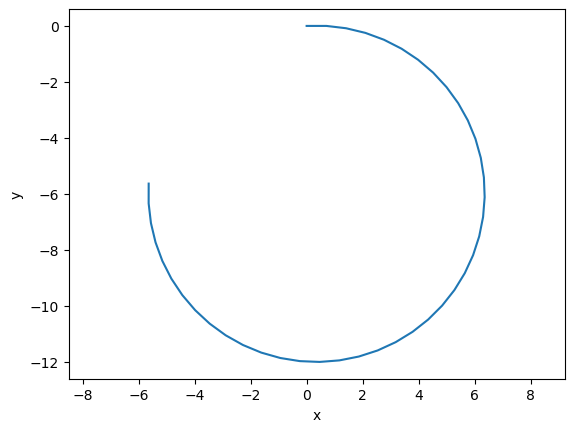

In [8]:
# Plot trajectory

# Change the beta and R to see effect

beta = pi/4 # pi/2
r = 2 

theta = 0

dt = 0.1
t = np.arange(0, 4 + dt, dt)

x_lst, y_lst = [0], [0]
for i in t:
    
    # Results of the forward kinematics
    PI_res = PI.subs({Phi_dot: 5, Beta: beta, Theta: theta, L: 6, R: r})
    x_dot, y_dot, theta_dot = float(PI_res[0]), float(PI_res[1]), float(PI_res[2])
    
    # Append the trajectory of the x and y
    x_lst.append(x_lst[-1] + x_dot * dt)
    y_lst.append(y_lst[-1] + y_dot * dt)
    
    theta += theta_dot * dt
    
plt.plot(x_lst, y_lst)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')